# Decision Tree Classifier on Wine Dataset

In this notebook, we will use the **Wine dataset** and apply the **Decision Tree Classifier** to classify different types of wine. We will also evaluate the model's performance using accuracy and visualize the confusion matrix.


### 1. Import Necessary Libraries

We first import the necessary libraries for data manipulation, model training, and visualization.


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Load the Wine Dataset

The Wine dataset is loaded from a CSV file located in the **Datasets** folder. We'll print the first few rows of the dataset to understand its structure.


In [2]:
# Load the Wine dataset (assuming the file is 'wine.csv' in your 'Datasets' folder)
wine_data = pd.read_csv('Datasets/wineData.csv')


## Drop the id 
wine_data = wine_data.drop('Id', axis=1)
# Display the first few rows of the dataset
print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### 3. Split the Dataset into Features and Target

We will now split the dataset into features (`X`) and target variable (`y`). The target is the wine class, while the features are the rest of the columns.


In [3]:
# Split the dataset into features (X) and target variable (y)
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target variable (wine class)


### 4. Split the Data into Training and Test Sets

We'll split the data into training and test sets (80% training, 20% testing) to train and evaluate the model.


In [4]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5. Train the Decision Tree Classifier

Now, we will create and train the Decision Tree model using the training data.


In [5]:
# Create and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### 6. Make Predictions on the Test Set

After training the model, we can use it to predict wine classes on the test set.


In [6]:
# Predict on the test set
y_pred = dt.predict(X_test)


### 7. Evaluate the Model's Performance

We will evaluate the model's accuracy on the test set and visualize the confusion matrix to see how well the model performed on each class.


In [7]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree: {accuracy:.2f}')


Accuracy of Decision Tree: 0.53


### 8. Visualize the Confusion Matrix

Finally, we visualize the confusion matrix to understand how well the model classified the different wine classes.


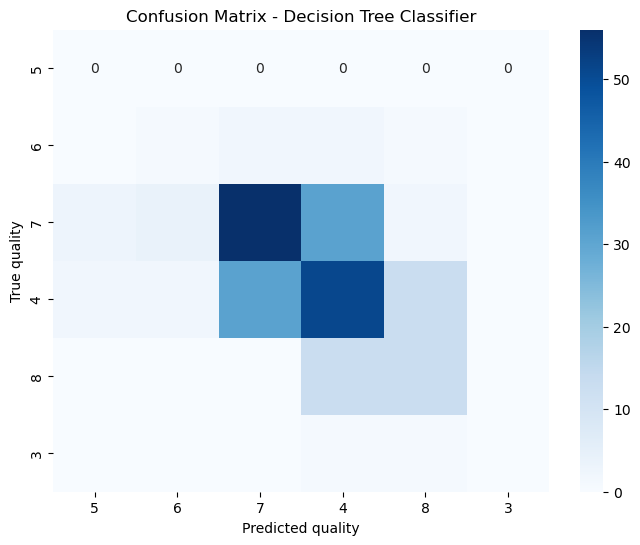

In [8]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted quality")
plt.ylabel("True quality")
plt.show()
